In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns

try:
    from probml_utils import latexify, savefig
except ModuleNotFoundError:
    %pip install git+https://github.com/probml/probml-utils.git
    from probml_utils import latexify, savefig

try:
    from tinygp import GaussianProcess, kernels
except ModuleNotFoundError:
    %pip install -qqq tinygp
    from tinygp import GaussianProcess, kernels

jax.config.update("jax_enable_x64", True)

In [2]:
latexify(width_scale_factor=3, fig_height=1.5)

/home/patel_zeel/miniconda3/envs/pyprobml/lib/python3.9/site-packages/probml_utils/plotting.py:25: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


In [3]:
c_0 = "#1f77b4"
c_1 = "#ff7f0e"

## Samples from prior (noiseless & noisy)

/home/patel_zeel/miniconda3/envs/pyprobml/lib/python3.9/site-packages/probml_utils/plotting.py:65: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


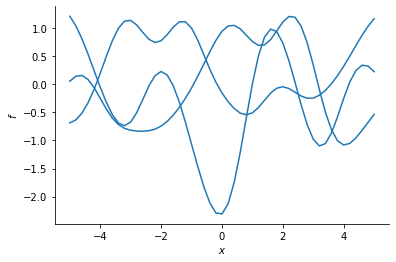

In [4]:
def sample_from_prior(key, data, save_name):
    kernel = kernels.ExpSquared(scale=1.0)
    gp = GaussianProcess(kernel, data["x"], diag=1e-8 + data["noise"])
    samples = gp.sample(key, shape=(data["n_samples"],))

    plt.figure()
    plt.plot(x, samples.T, color=c_0)
    plt.xlabel("$x$")
    plt.ylabel("$f$")
    #     plt.legend(["samples"], loc="lower left")
    sns.despine()
    if len(save_name) > 0:
        savefig(save_name)


key = jax.random.PRNGKey(0)
x = jnp.arange(-5, 5.2, 0.2)

data = {"noise": 0.0, "n_samples": 3, "x": x}
sample_from_prior(key, data, "gprDemoNoiseFreePrior")

## Samples from posterior (noiseless & noisy)

/home/patel_zeel/miniconda3/envs/pyprobml/lib/python3.9/site-packages/probml_utils/plotting.py:65: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")
/home/patel_zeel/miniconda3/envs/pyprobml/lib/python3.9/site-packages/probml_utils/plotting.py:65: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


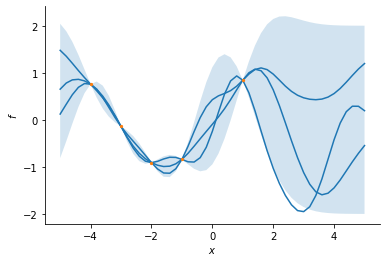

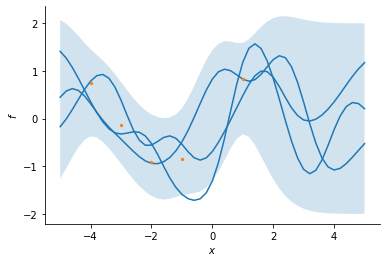

In [5]:
def sample_from_posterior(key, data, save_name):
    kernel = kernels.ExpSquared(scale=1.0)
    gp = GaussianProcess(kernel, data["x_train"], diag=1e-8 + data["noise"])
    pred_gp = gp.condition(data["y_train"], data["x_test"]).gp
    samples = pred_gp.sample(key, shape=(data["n_samples"],))
    mean = pred_gp.mean
    std = pred_gp.variance**0.5

    plt.figure()
    plt.plot(data["x_test"], samples.T, color=c_0)
    plt.scatter(data["x_train"], data["y_train"], color=c_1, zorder=10, s=5)
    plt.fill_between(data["x_test"].flatten(), mean - 2 * std, mean + 2 * std, alpha=0.2)
    plt.xlabel("$x$")
    plt.ylabel("$f$")
    #     plt.legend(["samples"], loc="lower left")
    sns.despine()
    if len(save_name) > 0:
        savefig(save_name)


key = jax.random.PRNGKey(0)
x_train = jnp.array([[-4], [-3], [-2], [-1], [1]])
y_train = jnp.sin(x_train).flatten()

x_test = jnp.arange(-5, 5.2, 0.2)

data = {"noise": 0.0, "n_samples": 3, "x_train": x_train, "y_train": y_train, "x_test": x_test}
sample_from_posterior(key, data, "gprDemoNoiseFreePost")

data = {"noise": 0.3, "n_samples": 3, "x_train": x_train, "y_train": y_train, "x_test": x_test}
sample_from_posterior(key, data, "gprDemoNoisyPost")

## Demo (variable noise)

In [6]:
from ipywidgets import interact


@interact(random_state=(1, 10), noise=(0.0, 0.2, 0.01))
def animate_gp_regression(random_state=0, noise=0):
    key = jax.random.PRNGKey(random_state)
    data = {"noise": noise, "n_samples": 3, "x_train": x_train, "y_train": y_train, "x_test": x_test}
    sample_from_posterior(key, data, "")
    plt.title(f"noise: {noise}, random_state: {random_state}")

interactive(children=(IntSlider(value=1, description='random_state', max=10, min=1), FloatSlider(value=0.0, de…